In [1]:
import pandas as pd

df = pd.read_excel("C:/Users/minsu/Downloads/미니프로젝트-쇼핑몰 실습데이터.xlsx")
# '판매금액', '업체명', '주문일자' 열에 대한 결측치를 모두 제거
df2 = df.dropna(subset=['판매금액', '업체명', '주문일자', '결제방법'])
# '지니 태블릿(후불집행)'을 '지니'로 변경
df2.loc[df2['업체명'] == '지니 태블릿(후불집행)', '업체명'] = '지니'

# '지니 태블릿'을 '지니'로 변경
df2.loc[df2['업체명'] == '지니 태블릿', '업체명'] = '지니'


In [2]:
import pandas as pd


# '결제방법' 열 값 변경
df2['결제방법'] = df2['결제방법'].replace({'가상계좌':'현금','무통장입금': '현금','현금간편결제': '현금','웰컴마일':'적립금'})


C:\Users\minsu\AppData\Local\Temp\ipykernel_21876\3775950332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['결제방법'] = df2['결제방법'].replace({'가상계좌':'현금','무통장입금': '현금','현금간편결제': '현금','웰컴마일':'적립금'})


In [3]:
# '결제방법' 열에서 앞글자만 추출하여 새로운 열 만들기
df2['앞글자'] = df2['결제방법'].apply(lambda x: x[0] if isinstance(x, str) and len(x) > 0 else None)

# 결과 출력
print(df2[['결제방법', '앞글자']])

# '결제방법'이 "-"인 행 제거
df2 = df2[df2['앞글자'] != ' ']
df2 = df2[df2['앞글자'] != '-']
df2 = df2[df2['앞글자'] != '정']
df2 = df2[df2['앞글자'] != '후']

# 결제 테스트인 행 제거
df2 = df2[df2['업체명'] != '셀러테스트']

# 결과 출력
df2['앞글자'].unique()


C:\Users\minsu\AppData\Local\Temp\ipykernel_21876\3605591734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['앞글자'] = df2['결제방법'].apply(lambda x: x[0] if isinstance(x, str) and len(x) > 0 else None)


         결제방법 앞글자
0        신용카드   신
1        신용카드   신
2        신용카드   신
3        신용카드   신
4        신용카드   신
...       ...  ..
218596    적립금   적
218597    적립금   적
218598  신 + 포   신
218599    포인트   포
218600   신용카드   신

[218586 rows x 2 columns]


array(['신', '현', '포', '적'], dtype=object)

In [4]:
df[df['업체명']=='셀러테스트']

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
1288,200113163559158,셀러테스트,일반상품 테스트,천재,1,2000,가상계좌,2020-01-13 16:37:13,환불완료,N,NaN,NaN
1505,200117091325768,셀러테스트,가상계좌 결제 테스트-현금영수증,일이삼사오,1,2000,신용카드,2020-01-17 09:14:40,주문취소,N,NaN,NaN
1506,200117091944180,셀러테스트,가상계좌 결제 테스트-현금영수증,일이삼사오,1,2000,신용카드,2020-01-17 09:21:00,주문취소,N,제작문구 넣어주세요,NaN
1508,200117101927908,셀러테스트,가상계좌 결제 테스트-현금영수증,일이삼사오,1,2000,신용카드,2020-01-17 10:20:42,주문취소,N,가나다라마바사아자차카,NaN
1682,200121110540917,셀러테스트,가상계좌 결제 테스트-현금영수증,일이삼사오,1,500,가상계좌,2020-01-21 11:06:57,환불완료,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
80243,210817142016333,셀러테스트,상담형 미결제상품,NaN,1,990000,-,2021-08-17 14:18:48,상담취소,N,NaN,NaN
80423,210818125409387,셀러테스트,상담형 미결제상품,NaN,1,990000,-,2021-08-18 12:52:42,상담취소,N,NaN,NaN
81115,210820120331467,셀러테스트,상담형 미결제상품,NaN,1,550000,-,2021-08-20 12:02:03,상담취소,N,NaN,NaN
81117,210820120725773,셀러테스트,상담형 미결제상품,NaN,1,550000,-,2021-08-20 12:05:57,상담취소,N,NaN,NaN


In [5]:
df2['앞글자'] = df2['앞글자'].replace('신', '신용카드')
df2['앞글자'] = df2['앞글자'].replace('현', '현금')
df2['앞글자'] = df2['앞글자'].replace('적', '적립금')
df2['앞글자'] = df2['앞글자'].replace('포', '포인트')

In [6]:
df2[df2['앞글자']=='신용카드'].tail()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,앞글자
218591,221108102949623,다우기술,[따뜻달달특가] 투썸플레이스-카페라떼(R),투썸플레이스,2,8200,신용카드,2022-11-08 10:27:29,배송완료,N,NaN,NaN,신용카드
218594,221108103621476,다우기술,[신세계] 신세계 상품권-1만원권,신세계,1,9600,신용카드,2022-11-08 10:34:01,배송완료,N,NaN,NaN,신용카드
218595,221108103722743,다우기술,[신세계] 신세계 상품권-1만원권,신세계,1,9600,신용카드,2022-11-08 10:35:02,배송완료,N,NaN,NaN,신용카드
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN,신용카드
218600,221108105148171,다우기술,[특별한 크리스마스] 2차-신세계 상품권 모바일 교환권-1만원권,신세계,17,161500,신용카드,2022-11-08 10:49:28,배송완료,N,NaN,NaN,신용카드


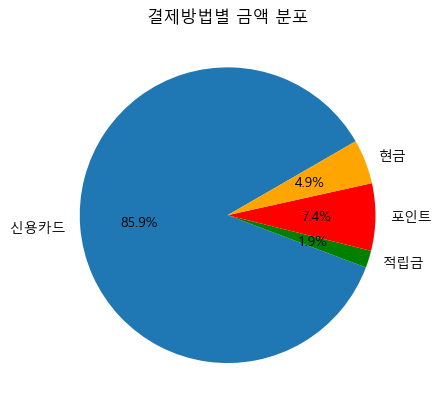

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

# 결제방법별로 금액 합산
payment = df2.groupby('앞글자')['판매금액'].sum()

# 파이 차트 그리기
custom_colors = ['#1f77b4','green','red','orange']
plt.pie(payment, labels=payment.index, autopct='%1.1f%%', startangle=30, colors=custom_colors)
plt.title('결제방법별 금액 분포')
plt.show()


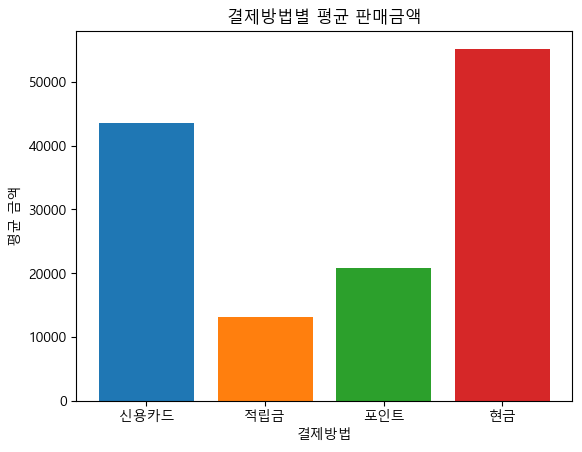

In [8]:
# 결제방법별 판매금액 평균 계산
average_payment = df2.groupby('앞글자')['판매금액'].mean().reset_index()

# 막대그래프 그리기
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.bar(average_payment['앞글자'], average_payment['판매금액'], color=custom_colors)
plt.title('결제방법별 평균 판매금액')
plt.xlabel('결제방법')
plt.ylabel('평균 금액')
plt.show()

In [9]:
# 각 결제방법별로 상위 1000개 행 추출
top_10_by_payment_method = df2.groupby('앞글자').apply(lambda group: group.nlargest(1000, '판매금액')).reset_index(drop=True)

# 각 결제방법별 '판매금액'의 평균 계산
average_sales_by_payment_method = top_10_by_payment_method.groupby('앞글자')['판매금액'].mean().reset_index()

# 결과 출력
print(average_sales_by_payment_method)


    앞글자        판매금액
0  신용카드  1628484.95
1   적립금    75614.05
2   포인트   220687.91
3    현금   332344.23


In [10]:
# 판매금액이 0이 아닌 데이터프레임 생성
nz_df2 = df2[df2['판매금액'] != 0]

# 각 결제방법별로 하위 1000개 행 추출
bottom_10_by_payment_method = nz_df2.groupby('앞글자').apply(lambda group: group.nsmallest(1000, '판매금액')).reset_index(drop=True)

# 각 결제방법별 '판매금액'의 평균 계산
average_sales_bottom_10_by_payment_method = bottom_10_by_payment_method.groupby('앞글자')['판매금액'].mean().reset_index()

# 결과 출력
print(average_sales_bottom_10_by_payment_method)

    앞글자      판매금액
0  신용카드    99.040
1   적립금  2215.610
2   포인트   100.000
3    현금  1900.195


In [11]:
true_money = df2[df2['처리상태'].isin(['구매확정','배송완료','배송준비','배송중','결제완료'])]

In [12]:



# 상품명별로 금액 합산
product = true_money.groupby('상품명')['판매금액'].sum()

# 판매금액을 높은 순으로 정렬
sorted_product = product.sort_values(ascending=False)
sorted_product.head(3)

상품명
[신세계] 신세계 상품권-4만원권            682444800
[스마트 HBE] 학습 전용 태블릿-일반결제      476388000
[명절상품권특가] 신세계 상품권 교환권-4만원권    255359300
Name: 판매금액, dtype: int64

In [33]:
new1 = true_money[true_money['상품명']=='[신세계] 신세계 상품권-4만원권']
sum_true = true_money['판매금액'].sum()
smart_tap = true_money[true_money['상품명']=='[스마트 HBE] 학습 전용 태블릿-일반결제']
new2 = true_money[true_money['상품명']=='[명절상품권특가] 신세계 상품권 교환권-4만원권']
sum_new2 = new2['판매금액'].sum()
sum_tap = smart_tap['판매금액'].sum()
sum_new1 = new1['판매금액'].sum()

sum3 = sum_new2 + sum_tap + sum_new1
print(sum3/sum_true)
new_price = new_world.groupby('앞글자')['판매금액'].sum()

0.25174771253891676


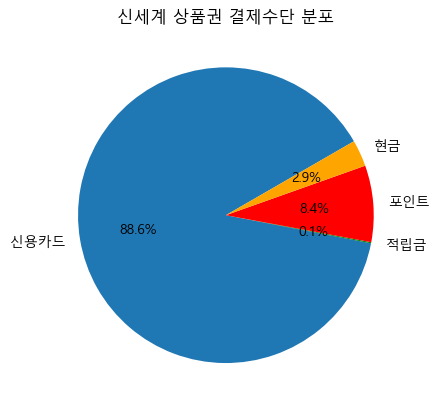

In [26]:
# 파이 차트 그리기
custom_colors = ['#1f77b4','green','red','orange']
plt.pie(new_price, labels=new_price.index, autopct='%1.1f%%', startangle=30, colors=custom_colors)
plt.title('신세계 상품권 결제수단 분포')
plt.show()


C:\Users\minsu\AppData\Local\Temp\ipykernel_21876\3091067221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1['연도'] = new1['주문일자'].dt.year
C:\Users\minsu\AppData\Local\Temp\ipykernel_21876\3091067221.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smart_tap['연도'] = smart_tap['주문일자'].dt.year
C:\Users\minsu\AppData\Local\Temp\ipykernel_21876\3091067221.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

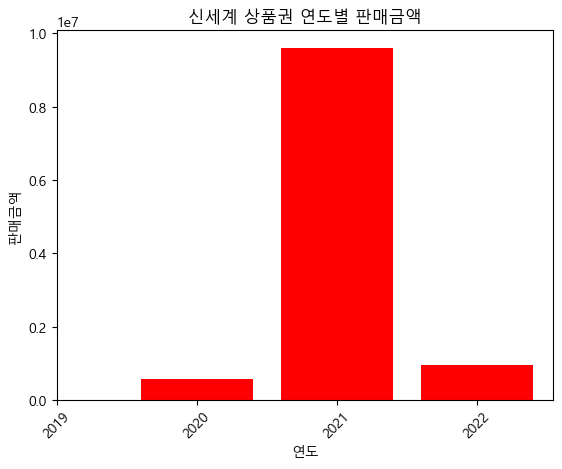

In [39]:
new1_year = new1.resample('Y', on='주문일자')['판매금액'].sum().reset_index()
new2_year = new2.resample('Y', on='주문일자')['판매금액'].sum().reset_index()
tap_year = smart_tap.resample('Y', on='주문일자')['판매금액'].sum().reset_index()

# 주문일자를 연도로 변경
new1['연도'] = new1['주문일자'].dt.year
smart_tap['연도'] = smart_tap['주문일자'].dt.year
new2['연도'] = new2['주문일자'].dt.year


plt.bar(new1['연도'], new1['판매금액'], color = 'red')
#그래프 크기 조절



plt.title('신세계 상품권 연도별 판매금액')
plt.xlabel('연도')
plt.ylabel('판매금액')
plt.xticks(rotation=45)  # X 축 레이블 회전
# X 축 눈금 설정
plt.xticks(range(2019,2023))
plt.show()

<BarContainer object of 248 artists>

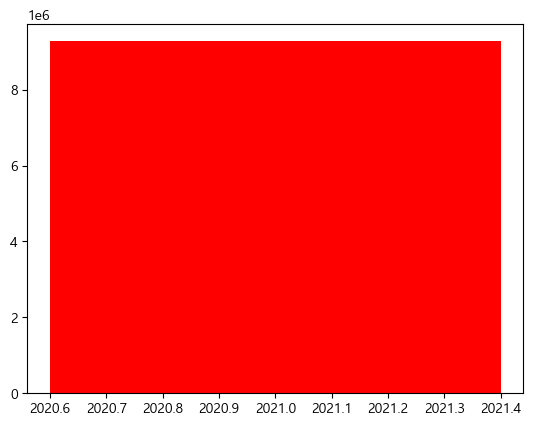

In [40]:
plt.bar(new2['연도'], new2['판매금액'], color = 'red')